In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn import linear_model
import scipy.stats as stats
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.precision", 4)

# Part 2 Investigating Momentum
## 1. Is momentum still profitable?*


In [2]:
# 1 
path = 'momentum_data.xlsx'
df_mom_size = pd.read_excel(path, sheet_name=4).set_index('Date')
df_factors = pd.read_excel(path, sheet_name=1).set_index('Date')
df_mom_size = df_mom_size.join(df_factors)
rf = pd.read_excel(path, sheet_name=5).set_index('Date')
df_mom_size = df_mom_size.join(rf)
df_momentum = pd.read_excel(path, sheet_name=3).set_index('Date')
df_momentum = df_momentum.join(rf)
df_mom_size


,SMALL LoPRIOR,ME1 PRIOR2,SMALL HiPRIOR,BIG LoPRIOR,ME2 PRIOR2,BIG HiPRIOR,MKT,SMB,HML,RF
Date,,,,,,,,,,
1927-01-31,0.0008,0.0357,0.0040,-0.0040,0.0026,0.0000,-0.0006,-0.0037,0.0454,0.0025
1927-02-28,0.0701,0.0648,0.0551,0.0727,0.0380,0.0447,0.0418,0.0004,0.0294,0.0026
1927-03-31,-0.0346,-0.0288,-0.0206,-0.0357,-0.0018,0.0226,0.0013,-0.0165,-0.0261,0.0030
1927-04-30,-0.0075,-0.0048,0.0332,-0.0272,0.0075,0.0181,0.0046,0.0030,0.0081,0.0025
1927-05-31,0.0248,0.1115,0.0683,0.0552,0.0496,0.0718,0.0544,0.0153,0.0473,0.0030
...,...,...,...,...,...,...,...,...,...,...
2022-05-31,-0.0274,0.0083,0.0172,-0.0093,0.0008,-0.0043,-0.0034,-0.0185,0.0841,0.0003
2022-06-30,-0.0748,-0.0601,-0.1011,-0.1159,-0.0799,-0.0736,-0.0843,0.0209,-0.0597,0.0006
2022-07-31,0.1188,0.0983,0.0973,0.1448,0.0872,0.0870,0.0957,0.0281,-0.0410,0.0008


In [3]:
# Construct the FF-momentum  return

df_mom_size['rx_mom_FF'] = (1/2 *(df_mom_size['BIG HiPRIOR'] + df_mom_size['SMALL HiPRIOR']) -
  1/2 * (df_mom_size['BIG LoPRIOR'] + df_mom_size['SMALL LoPRIOR'])) # same as UMD
df_mom_size

,SMALL LoPRIOR,ME1 PRIOR2,SMALL HiPRIOR,BIG LoPRIOR,ME2 PRIOR2,BIG HiPRIOR,MKT,SMB,HML,RF,rx_mom_FF
Date,,,,,,,,,,,
1927-01-31,0.0008,0.0357,0.0040,-0.0040,0.0026,0.0000,-0.0006,-0.0037,0.0454,0.0025,0.0036
1927-02-28,0.0701,0.0648,0.0551,0.0727,0.0380,0.0447,0.0418,0.0004,0.0294,0.0026,-0.0215
1927-03-31,-0.0346,-0.0288,-0.0206,-0.0357,-0.0018,0.0226,0.0013,-0.0165,-0.0261,0.0030,0.0362
1927-04-30,-0.0075,-0.0048,0.0332,-0.0272,0.0075,0.0181,0.0046,0.0030,0.0081,0.0025,0.0430
1927-05-31,0.0248,0.1115,0.0683,0.0552,0.0496,0.0718,0.0544,0.0153,0.0473,0.0030,0.0301
...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,-0.0274,0.0083,0.0172,-0.0093,0.0008,-0.0043,-0.0034,-0.0185,0.0841,0.0003,0.0248
2022-06-30,-0.0748,-0.0601,-0.1011,-0.1159,-0.0799,-0.0736,-0.0843,0.0209,-0.0597,0.0006,0.0080
2022-07-31,0.1188,0.0983,0.0973,0.1448,0.0872,0.0870,0.0957,0.0281,-0.0410,0.0008,-0.0397


In [4]:
# fill the tab with momentum performance
table1 = pd.DataFrame(index=['1927-2021', '1927-1993', '1994-2008', '2009-2021'],
    columns=['mean ', 'vol ', 'sharpe_ratio ', 'skew ', 'corr_to_mkt ', 'corr_to_value', ])

# calculate momentum performace 
def table_row(df, portfolio, annualize_factor=12):
    mean = df[portfolio].mean() * annualize_factor
    vol = df[portfolio].std() * np.sqrt(annualize_factor)
    sharpe_ratio = mean/vol
    skew = df[portfolio].skew() #unscaled
    corr = df[[portfolio, 'MKT', 'HML']].corr()
    corr_to_mkt = corr.loc[portfolio, 'MKT']
    corr_to_value = corr.loc[portfolio, 'HML']
    return [mean, vol, sharpe_ratio, skew, corr_to_mkt, corr_to_value]


table1.loc['1927-2021', :] = table_row(df_mom_size.loc['1927':'2020',:], portfolio='rx_mom_FF')
table1.loc['1927-1993', :] = table_row(df_mom_size.loc['1927':'1993',:], portfolio='rx_mom_FF')
table1.loc['1994-2008', :] = table_row(df_mom_size.loc['1994':'2008',:], portfolio='rx_mom_FF')
table1.loc['2009-2021', :] = table_row(df_mom_size.loc['2009':'2020',:], portfolio='rx_mom_FF')
table1

,mean,vol,sharpe_ratio,skew,corr_to_mkt,corr_to_value
1927-2021,0.0776,0.1634,0.4751,-3.0248,-0.345,-0.4231
1927-1993,0.0901,0.16,0.563,-3.8093,-0.3625,-0.4949
1994-2008,0.1043,0.1755,0.5943,-0.5824,-0.2345,-0.1307
2009-2021,-0.0253,0.1645,-0.1538,-2.8547,-0.3816,-0.4601


### a) The table 1 filled as above.
### b) Has momentum changed much over time, as seen through these subsample statistics?
we can see that the performance of momentum had been relatively stable until 2009, after when it has performed more poorly. However its corrlation to market an value factor has been stable since 1927,so was its volitility.
### c) Does this data support AQR’s argument that momentum is an important piece of the ideal portfolio? What if mean returns to momentum are in actuality near zero due to transaction costs—would there still be evidence here that momentum is valuable?
Considering that the recent poor performance of momentum has been caused by 2008 financial crisis, it appears that the momentum is an valuable piece of the ideal portfolio. In addition, even though mean returns to momentum are in actuality near zero due to transaction costs, its stable negative correlation to MRT factor and value factor makes it valuable for investor looking for diversification.

## 2. Whether a long-only implementation of momentum is valuable ?


In [7]:
#a) Construct your own long-only implementation:
df_mom_size['rx_mom_U_FF'] = 1/2 *(df_mom_size['BIG HiPRIOR'] + df_mom_size['SMALL HiPRIOR']) -df_mom_size['RF']
df_mom_size

,SMALL LoPRIOR,ME1 PRIOR2,SMALL HiPRIOR,BIG LoPRIOR,ME2 PRIOR2,BIG HiPRIOR,MKT,SMB,HML,RF,rx_mom_FF,rx_mom_U_FF
Date,,,,,,,,,,,,
1927-01-31,0.0008,0.0357,0.0040,-0.0040,0.0026,0.0000,-0.0006,-0.0037,0.0454,0.0025,0.0036,-0.0005
1927-02-28,0.0701,0.0648,0.0551,0.0727,0.0380,0.0447,0.0418,0.0004,0.0294,0.0026,-0.0215,0.0473
1927-03-31,-0.0346,-0.0288,-0.0206,-0.0357,-0.0018,0.0226,0.0013,-0.0165,-0.0261,0.0030,0.0362,-0.0020
1927-04-30,-0.0075,-0.0048,0.0332,-0.0272,0.0075,0.0181,0.0046,0.0030,0.0081,0.0025,0.0430,0.0232
1927-05-31,0.0248,0.1115,0.0683,0.0552,0.0496,0.0718,0.0544,0.0153,0.0473,0.0030,0.0301,0.0670
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,-0.0274,0.0083,0.0172,-0.0093,0.0008,-0.0043,-0.0034,-0.0185,0.0841,0.0003,0.0248,0.0062
2022-06-30,-0.0748,-0.0601,-0.1011,-0.1159,-0.0799,-0.0736,-0.0843,0.0209,-0.0597,0.0006,0.0080,-0.0880
2022-07-31,0.1188,0.0983,0.0973,0.1448,0.0872,0.0870,0.0957,0.0281,-0.0410,0.0008,-0.0397,0.0914


In [8]:
# create table 2
table2 = pd.DataFrame(index=['long_short', 'long_only'],
    columns=['mean ', 'vol ', 'sharpe_ratio ', 'skew ', 'corr_to_mkt ', 'corr_to_value', ])

table2.loc['long_short', :] = table_row(df_mom_size['1994':], portfolio='rx_mom_FF')
table2.loc['long_only', :] = table_row(df_mom_size['1994':], portfolio='rx_mom_U_FF')

table2

,mean,vol,sharpe_ratio,skew,corr_to_mkt,corr_to_value
long_short,0.0473,0.1686,0.2807,-1.4337,-0.3061,-0.2385
long_only,0.1128,0.1789,0.6304,-0.4829,0.9035,-0.1547


### a)  Fill out Table 2 for the data in the period 1994-2021.
Table 2 comparing performance of long_short with long_only portfolio filled as above.
### b)  Is long-only momentum as attractive as long-short momentum with respect to mean, volatility, and Sharpe Ratio?
We can observe that the long-only momentum is more attractive than long-short momentum in terms of higher mean, similar volatility and thus higher Sharpe Ratio. 

### c) Is long-only momentum as diversifying as long-short momentum with respect to market and value premia?
We can tell that long-only momentum is not diversifying in terms of market factor since it is highly correlated to the market.
### d) Show a plot of the cumulative product of 1 +  ̃rmom:FF and 1 +  ̃rmomU:FF over the 1994-2021 subsample.
See plot below.


Text(0.5, 1.0, 'Figure 1: Cumulative excess return on long_short momentum and long-only momentum strategies.')

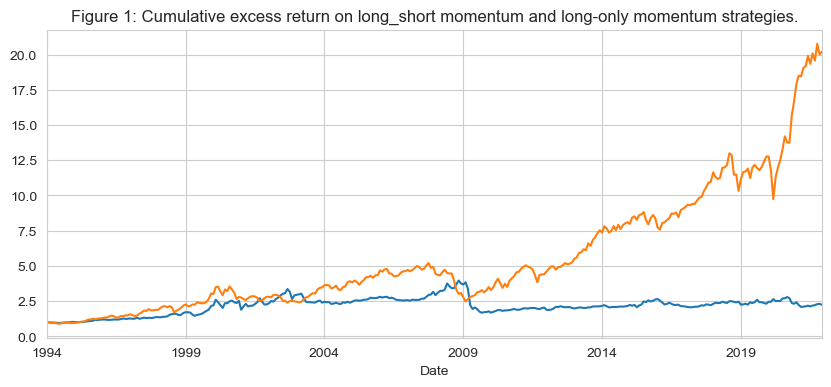

In [26]:
# d) plot the cumulative products

sns.set_style("whitegrid")
(df_mom_size.loc['1994':'2021', 'rx_mom_FF'] + 1).cumprod().plot(figsize=(10,4))
(df_mom_size.loc['1994':'2021', 'rx_mom_U_FF'] + 1).cumprod().plot(figsize=(10,4))
plt.title('Figure 1: Cumulative excess return on long_short momentum and long-only momentum strategies.')



## 3. Is momentum just data mining, or is it a robust strategy?
### a) Compare all three constructions, (in the full-sample period,) by filling out the stats in the table below for the period 1994-2021.
see the table below.

In [40]:
# a)
df_momentum['rx_mom_D1'] = df_momentum['Hi PRIOR'] - df_momentum['Lo PRIOR']
df = df_mom_size.join(df_momentum, rsuffix='momentum_')
df['rx_mom_D3'] = (1/3 * (df['PRIOR 8'] + df['PRIOR 9'] + df['Hi PRIOR']) -\
                1/3 * (df['Lo PRIOR'] + df['PRIOR 2'] + df['PRIOR 3']))
df['rx_mom_D5'] = (1/5 * (df['PRIOR 6'] + df['PRIOR 7'] + df['PRIOR 8'] + df['PRIOR 9'] + df['Hi PRIOR']) -\
                1/5 * (df['Lo PRIOR'] + df['PRIOR 2'] + df['PRIOR 3'] + df['PRIOR 4'] + df['PRIOR 5']))
df

,SMALL LoPRIOR,ME1 PRIOR2,SMALL HiPRIOR,BIG LoPRIOR,ME2 PRIOR2,BIG HiPRIOR,MKT,SMB,HML,RF,...,PRIOR 5,PRIOR 6,PRIOR 7,PRIOR 8,PRIOR 9,Hi PRIOR,RFmomentum_,rx_mom_D1,rx_mom_D3,rx_mom_D5
Date,,,,,,,,,,,,,,,,,,,,,
1927-01-31,0.0008,0.0357,0.0040,-0.0040,0.0026,0.0000,-0.0006,-0.0037,0.0454,0.0025,...,-0.0041,0.0097,0.0074,0.0036,-0.0041,-0.0024,0.0025,0.0308,0.0160,0.0145
1927-02-28,0.0701,0.0648,0.0551,0.0727,0.0380,0.0447,0.0418,0.0004,0.0294,0.0026,...,0.0322,0.0421,0.0283,0.0326,0.0420,0.0701,0.0026,-0.0052,-0.0241,-0.0214
1927-03-31,-0.0346,-0.0288,-0.0206,-0.0357,-0.0018,0.0226,0.0013,-0.0165,-0.0261,0.0030,...,-0.0048,-0.0242,0.0205,0.0041,0.0096,0.0547,0.0030,0.0870,0.0567,0.0438
1927-04-30,-0.0075,-0.0048,0.0332,-0.0272,0.0075,0.0181,0.0046,0.0030,0.0081,0.0025,...,0.0220,-0.0005,0.0205,-0.0059,0.0159,0.0549,0.0025,0.0345,0.0337,0.0226
1927-05-31,0.0248,0.1115,0.0683,0.0552,0.0496,0.0718,0.0544,0.0153,0.0473,0.0030,...,0.0636,0.0580,0.0496,0.0681,0.0811,0.0632,0.0030,0.0360,0.0267,0.0184
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-31,-0.0274,0.0083,0.0172,-0.0093,0.0008,-0.0043,-0.0034,-0.0185,0.0841,0.0003,...,-0.0027,0.0020,-0.0158,-0.0073,-0.0118,0.0154,0.0003,0.0973,0.0216,0.0047
2022-06-30,-0.0748,-0.0601,-0.1011,-0.1159,-0.0799,-0.0736,-0.0843,0.0209,-0.0597,0.0006,...,-0.0833,-0.0752,-0.0669,-0.0779,-0.0557,-0.1014,0.0006,0.0090,0.0327,0.0289
2022-07-31,0.1188,0.0983,0.0973,0.1448,0.0872,0.0870,0.0957,0.0281,-0.0410,0.0008,...,0.0796,0.1032,0.0831,0.1162,0.0393,0.0781,0.0008,-0.0715,-0.0600,-0.0323


In [41]:
table3 = pd.DataFrame(columns=['mean ', 'vol ', 'sharpe_ratio ', 'skew ', 'corr_to_mkt ', 'corr_to_value', ])
table3.loc['rx_mom_D1', :] = table_row(df['1994':], portfolio='rx_mom_D1')
table3.loc['rx_mom_D3', :] = table_row(df['1994':], portfolio='rx_mom_D3')
table3.loc['rx_mom_D5', :] = table_row(df['1994':], portfolio='rx_mom_D5')

table3

,mean,vol,sharpe_ratio,skew,corr_to_mkt,corr_to_value
rx_mom_D1,0.0794,0.298,0.2665,-1.3236,-0.3356,-0.2364
rx_mom_D3,0.0342,0.1926,0.1776,-1.3554,-0.3654,-0.2299
rx_mom_D5,0.018,0.134,0.1345,-1.4354,-0.3579,-0.2275


In [42]:
table2


,mean,vol,sharpe_ratio,skew,corr_to_mkt,corr_to_value
long_short,0.0473,0.1686,0.2807,-1.4337,-0.3061,-0.2385
long_only,0.1128,0.1789,0.6304,-0.4829,0.9035,-0.1547


### b) Do the tradeoffs between the 1-decile, 3-decile, and 5-decile constructions line up with the theoretical tradeoffs we discussed in the lecture?
Yes, since the lecture mentioned that in theory, more extreme difference between winner and loser group will lead to higher mean and higher volitility.
### c) Should AQR’s retail product consider using a 1-decile or 5-decile construction?
Both of two options may not be AQR's optimal choices: 1-decile indeed has higher mean, lower trans costs but it exposes to higher volatility. 5_decile will have much lower mean return and volitility but the return will be hurt by the huge trans costs.  
### d) Does  ̃rmomD3 have similar stats to the Fama-French construction in (1).  Recall that con- struction is also a 3-decile, long-short construction, but it is segmented for small and large stocks. Compare the middle row of Table 3 with the top row of Table 2.
We can observe that the Fama-French construction has a larger mean, a smaller vol, and thus a higher sharpe ratio. While other measures remain silimar in these two constructions, therefore Fama-French construction yields stronger performance overall.


## 4. Does implementing momentum require trading lots of small stocks—thus causing even larger trading costs?
### a)  Fill out Table 4 over the sample 1994-2021.
see table 4 below.



In [52]:
# 4a).
# construct a small-stock momentum portfolio
df_mom_size['rx_mom_S'] = df_mom_size['SMALL HiPRIOR'] - df_mom_size['SMALL LoPRIOR']
df_mom_size['rx_mom_B'] = df_mom_size['BIG HiPRIOR'] - df_mom_size['BIG LoPRIOR']
table4 = pd.DataFrame(columns=['mean ', 'vol ', 'sharpe_ratio ', 'skew ', 'corr_to_mkt ', 'corr_to_value'])

table4.loc['All stocks, rmom:FF', :] = table_row(df_mom_size['1994':], portfolio='rx_mom_FF')
table4.loc['Small stocks rmomS',:] = table_row(df_mom_size['1994':], portfolio='rx_mom_S')
table4.loc['Large stocks rmomB', :] = table_row(df_mom_size['1994':], portfolio='rx_mom_B')

table4


,mean,vol,sharpe_ratio,skew,corr_to_mkt,corr_to_value
"All stocks, rmom:FF",0.0473,0.1686,0.2807,-1.4337,-0.3061,-0.2385
Small stocks rmomS,0.0627,0.1716,0.3656,-1.7501,-0.3069,-0.1647
Large stocks rmomB,0.0319,0.1819,0.1755,-0.8576,-0.278,-0.2869


### b) Is the attractiveness of the momentum strategy mostly driven by the small stocks? That is, does a momentum strategy in large stocks still deliver excess returns at comparable risk?
From the observation, it seems that small stocks do have a slightly higher drive in terms of the momentum premia. However considering its higher trans costs and higher liquidity risk, it is hard to tell, without further statistics, which one: larger or smaller can deliver excess return at comparable risk.

## 5. In conclusion, what is your assessment of the AQR retail product? Is it capturing the important features of the Fama-French construction of momentum? Would you suggest any modifications?
In one sentence, strong expected return and very high correlatio to the market. This feature is derived by the long-only construction, so simply resort by size and change decile will not help this high correlation. 